In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\myrit\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [8]:
X = df.iloc[:, 2:4]
y = df['Purchased']

In [15]:
X.shape

(400, 2)

# Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()
x = sc.fit_transform(X)

In [13]:
x

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

# Train-Test Spliting

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)

In [17]:
X_train.shape

(300, 2)

# Model Training

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
model = KNeighborsClassifier(n_neighbors=5, p=2)
model.fit(X_train, y_train)

KNeighborsClassifier()

# Model Evaluation

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [21]:
y_pred = model.predict(X_test)

In [22]:
pd.DataFrame({"Acutal": y_test, "Prediction": y_pred})

,Acutal,Prediction
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,0
135,0,0
390,1,1
264,1,1


In [23]:
confusion_matrix(y_test, y_pred)

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [24]:
accuracy_score(y_test, y_pred)

0.93

In [26]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



# Best K values

In [27]:
k = range(1, 11)

accuracy_value = []

for k_val in k:
    model = KNeighborsClassifier(n_neighbors=k_val, p=2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_value.append(accuracy_score(y_test, y_pred))

In [28]:
accuracy_value

[0.88, 0.9, 0.93, 0.92, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93]

In [29]:
errors = 1- np.array(accuracy_value)
errors

array([0.12, 0.1 , 0.07, 0.08, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07])

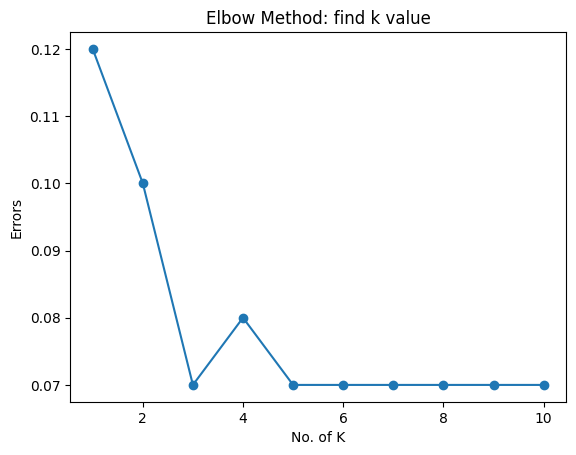

In [35]:
plt.plot(k, errors)
plt.scatter(k, errors)
plt.title("Elbow Method: find k value")
plt.xlabel("No. of K")
plt.ylabel("Errors")
plt.show()